# __Training an xgboost model__

xgboost does not belong to classical time series models, however it is used frequently in the data science community for time series forecasts. The model uses base learners which are commonly decision trees. The training is based on gradient descent.

## __Data preparation__

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import xgboost as xgb

import joblib

import warnings
warnings.simplefilter('ignore')

In [2]:
file_path = '../data/test_time_features.pkl'
df = pd.read_pickle(file_path)

In [3]:
df.isna().any()

t CO2-e / MWh     True
year             False
minute_sin       False
minute_cos       False
hour_sin         False
hour_cos         False
weekday_sin      False
month_sin        False
month_cos        False
lag1              True
lag2              True
lag3              True
lag4              True
lag5              True
lag6              True
lag7              True
lag8              True
lag9              True
lag10             True
lag11             True
lag12             True
horizon0          True
dtype: bool

In [4]:
#our lagging operation caused the introduction of NaN values into our dataset which need to be removed before the xgboost
df.dropna(inplace=True)

In [5]:
df.isna().any()

t CO2-e / MWh    False
year             False
minute_sin       False
minute_cos       False
hour_sin         False
hour_cos         False
weekday_sin      False
month_sin        False
month_cos        False
lag1             False
lag2             False
lag3             False
lag4             False
lag5             False
lag6             False
lag7             False
lag8             False
lag9             False
lag10            False
lag11            False
lag12            False
horizon0         False
dtype: bool

### __train / validation split__

In [6]:
def train_test_ts(df, maximal_lag, horizon):
    '''
    Time series (ts) split function creates a train/test set under consideration of potential overlap between the two due to lag processing
    X_train, y_train, X_test, y_test = ...
    df=must contain target column as "target"; all other columns must be used as features
    percentage_train=how much of the total dataset shall be used for training; must be added between 0 - 1
    maximal_lag=out of all lag feature engineering, enter the maximal lag number
    '''
    data_test = df.iloc[maximal_lag:,:]
    #to avoid overlapping of train and test data, a gap of the maximal lag - 1 must be included between the two sets
    
    #returns in the sequence X_train, y_train, X_test, y_test
    return (data_test.drop(columns=[f"horizon{horizon}","t CO2-e / MWh"], axis=1), data_test[f"horizon{horizon}"])

### __Prediction with model__

Initially, we will do the model training without the lag features together. In an exerice, you will do it yourself with the entire feature set, i.e. including the lag features.

In [7]:
def errors_test(model, X_test, y_test):

    test_mae = (sum(abs(y_test - model.predict(X_test)))/len(y_test))
    test_mape = (sum(abs((y_test - model.predict(X_test))/y_test)))*(100/len(y_test))
    test_smape = sum(abs(y_test - model.predict(X_test)))/sum(y_test + model.predict(X_test))

    print(f'test_MAE: {test_mae}')
    print(f'test_MAPE: {test_mape}')
    print(f'test_SMAPE: {test_smape}')

In [8]:
X_test, y_test = train_test_ts(df, 12, 0)

model = joblib.load('../model_all_features.pkl')
model.fit(X_test, y_test)

errors_test(model, X_test, y_test)

[15:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test_MAE: 0.2260751956782143
test_MAPE: inf
test_SMAPE: 0.19713869125858866


__If we compare the outcome to our train / validation error metrics, we will find that moderate overfitting occurs. Anyway, we already figured out that xgboost cannot perform forecasts on our dataset given the current conditions.__

### __Visualisation__

#### __48 h interval__

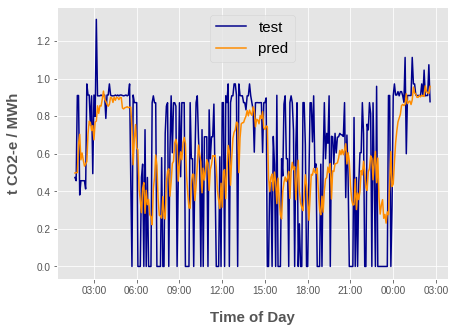

In [9]:
plt.figure(figsize=(7,5))
plt.style.use('ggplot')

fig = plt.plot_date(y_test.index[300:600],y_test.iloc[300:600], linestyle='solid', marker=None, label="test", color='darkblue')
fig = plt.plot_date(y_test.index[300:600],model.predict(X_test)[300:600], linestyle='solid', marker=None, color='darkorange', label="pred")
plt.legend(fontsize=15)

plt.xlabel("Time of Day", labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel("t CO2-e / MWh", labelpad=15, fontsize=15, fontweight='bold')

date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.style.use('seaborn')

#### __4 h interval__

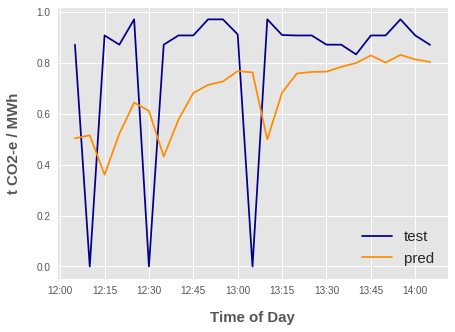

In [10]:
plt.figure(figsize=(7,5))
plt.style.use('ggplot')

fig = plt.plot_date(y_test.index[425:450],y_test.iloc[425:450], linestyle='solid', marker=None, label="test", color='darkblue')
fig = plt.plot_date(y_test.index[425:450],model.predict(X_test)[425:450], linestyle='solid', marker=None, color='darkorange', label="pred")
plt.legend(fontsize=15)

plt.xlabel("Time of Day", labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel("t CO2-e / MWh", labelpad=15, fontsize=15, fontweight='bold')

date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.style.use('seaborn')